# Weight Initialization

## Imports

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from baseSetterHelper import setAllSeeds, setDeterministic, computeAccu
from trainerHelper import modelTrainer
from plottingHelper import plotTrainingLoss, plotAccuracy, show_examples
from dataLoaderHelper import getDataLoadersMNIST

## Setting Parameters

In [10]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [11]:
setAllSeeds(RANDOM_SEED)
setDeterministic()

## Data Imports and Loader

In [12]:
trainLoader, validLoader, testLoader = getDataLoadersMNIST(
    batchSize=BATCH_SIZE,
    validFraction=0.1)

# Checking the dataset
for images, labels in trainLoader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


##  Class Making

In [13]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, numFeatures, numClasses, dropProba, numHidden1, numHidden2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(numFeatures, numHidden1),
            # torch.nn.BatchNorm1d(numHidden1),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # 2nd hidden layer
            torch.nn.Linear(numHidden1, numHidden2),
            # torch.nn.BatchNorm1d(numHidden2),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # output layer
            torch.nn.Linear(numHidden2, numClasses)
        )

        for modu in self.modules():
          if (isinstance(modu,torch.nn.Linear)):
            modu.weight.detach().normal_(0,0.001)
            if (modu.bias is not None):
              modu.bias.detach().zero_()

    def forward(self, x):
        logits = self.my_network(x)
        return logits

## Without Dropout/ Drop Prob =0

In [14]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.0,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [15]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.3026
Epoch:001/050 | Batch:050/210 |  Cost:2.3003
Epoch:001/050 | Batch:100/210 |  Cost:2.3044
Epoch:001/050 | Batch:150/210 |  Cost:2.2988
Epoch:001/050 | Batch:200/210 |  Cost:2.2980
Epoch:001/050 |
Train Acc 11.3095%
Val Acc   10.5000%
Time Taken: 0.27 min
Epoch:002/050 | Batch:000/210 |  Cost:2.3005
Epoch:002/050 | Batch:050/210 |  Cost:2.2974
Epoch:002/050 | Batch:100/210 |  Cost:2.3039
Epoch:002/050 | Batch:150/210 |  Cost:2.3035
Epoch:002/050 | Batch:200/210 |  Cost:2.3043
Epoch:002/050 |
Train Acc 11.3095%
Val Acc   10.5000%
Time Taken: 0.54 min
Epoch:003/050 | Batch:000/210 |  Cost:2.3041
Epoch:003/050 | Batch:050/210 |  Cost:2.3008
Epoch:003/050 | Batch:100/210 |  Cost:2.3050
Epoch:003/050 | Batch:150/210 |  Cost:2.2976
Epoch:003/050 | Batch:200/210 |  Cost:2.2991
Epoch:003/050 |
Train Acc 11.3188%
Val Acc   10.5000%
Time Taken: 0.82 min
Epoch:004/050 | Batch:000/210 |  Cost:2.2990
Epoch:004/050 | Batch:050/210 |  Cost:2.2989
Epoch:004/

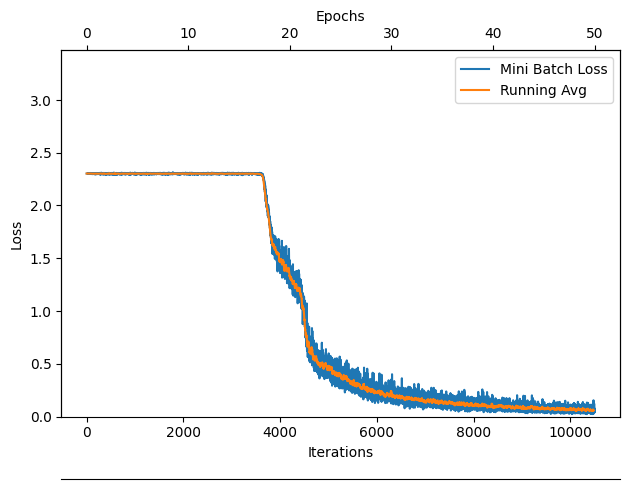

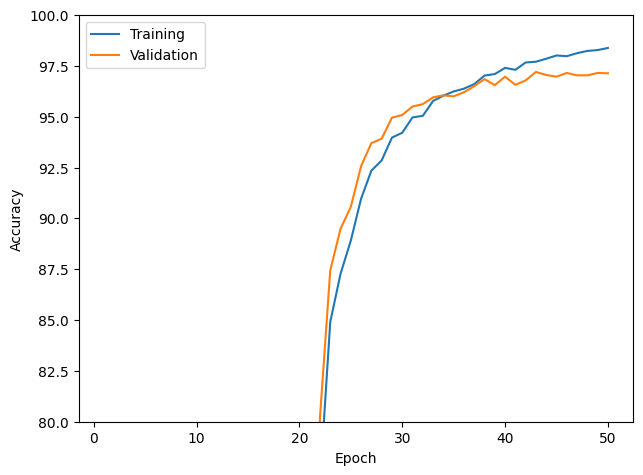

In [16]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## With Dropout as 0.5

In [17]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.5,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [18]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.3026
Epoch:001/050 | Batch:050/210 |  Cost:2.3003
Epoch:001/050 | Batch:100/210 |  Cost:2.3044
Epoch:001/050 | Batch:150/210 |  Cost:2.2988
Epoch:001/050 | Batch:200/210 |  Cost:2.2980
Epoch:001/050 |
Train Acc 11.3188%
Val Acc   10.5000%
Time Taken: 0.28 min
Epoch:002/050 | Batch:000/210 |  Cost:2.3034
Epoch:002/050 | Batch:050/210 |  Cost:2.2977
Epoch:002/050 | Batch:100/210 |  Cost:2.3111
Epoch:002/050 | Batch:150/210 |  Cost:2.2975
Epoch:002/050 | Batch:200/210 |  Cost:2.3007
Epoch:002/050 |
Train Acc 11.3077%
Val Acc   10.5000%
Time Taken: 0.57 min
Epoch:003/050 | Batch:000/210 |  Cost:2.2995
Epoch:003/050 | Batch:050/210 |  Cost:2.3004
Epoch:003/050 | Batch:100/210 |  Cost:2.3019
Epoch:003/050 | Batch:150/210 |  Cost:2.3053
Epoch:003/050 | Batch:200/210 |  Cost:2.3005
Epoch:003/050 |
Train Acc 11.3207%
Val Acc   10.5000%
Time Taken: 0.84 min
Epoch:004/050 | Batch:000/210 |  Cost:2.2996
Epoch:004/050 | Batch:050/210 |  Cost:2.2998
Epoch:004/

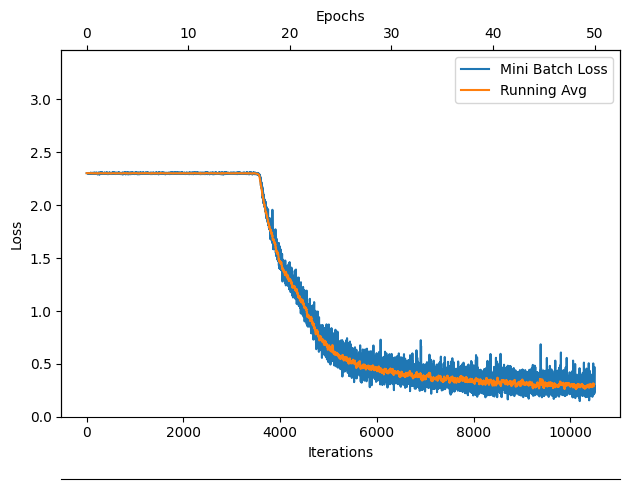

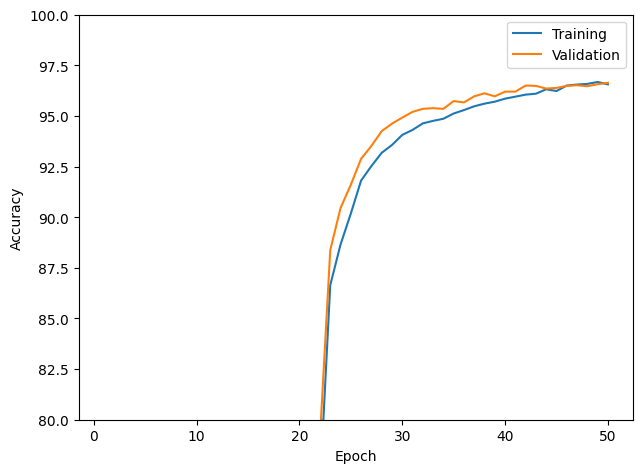

In [19]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## With Dropout as 0.1

In [20]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.1,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [21]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.3026
Epoch:001/050 | Batch:050/210 |  Cost:2.3003
Epoch:001/050 | Batch:100/210 |  Cost:2.3044
Epoch:001/050 | Batch:150/210 |  Cost:2.2988
Epoch:001/050 | Batch:200/210 |  Cost:2.2980
Epoch:001/050 |
Train Acc 11.3188%
Val Acc   10.5000%
Time Taken: 0.29 min
Epoch:002/050 | Batch:000/210 |  Cost:2.3034
Epoch:002/050 | Batch:050/210 |  Cost:2.2977
Epoch:002/050 | Batch:100/210 |  Cost:2.3111
Epoch:002/050 | Batch:150/210 |  Cost:2.2975
Epoch:002/050 | Batch:200/210 |  Cost:2.3007
Epoch:002/050 |
Train Acc 11.3077%
Val Acc   10.5000%
Time Taken: 0.57 min
Epoch:003/050 | Batch:000/210 |  Cost:2.2995
Epoch:003/050 | Batch:050/210 |  Cost:2.3004
Epoch:003/050 | Batch:100/210 |  Cost:2.3019
Epoch:003/050 | Batch:150/210 |  Cost:2.3053
Epoch:003/050 | Batch:200/210 |  Cost:2.3005
Epoch:003/050 |
Train Acc 11.3207%
Val Acc   10.5000%
Time Taken: 0.84 min
Epoch:004/050 | Batch:000/210 |  Cost:2.2996
Epoch:004/050 | Batch:050/210 |  Cost:2.2998
Epoch:004/

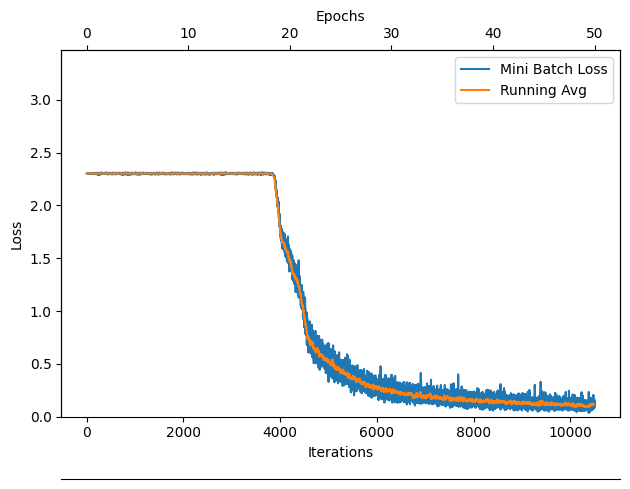

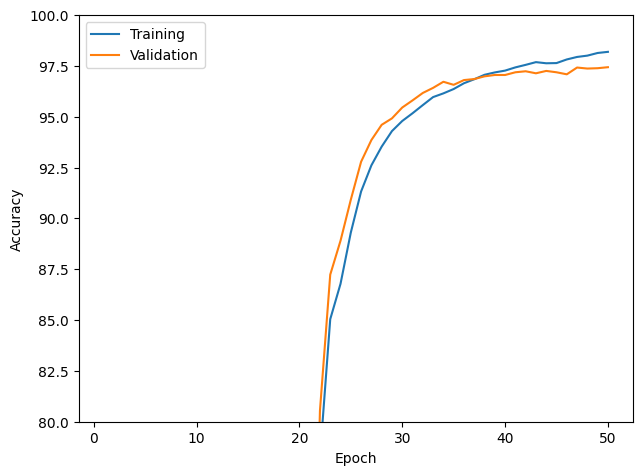

In [22]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()